In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
import seaborn as sns

# Read csv files
athletes_bio_csv = pd.read_csv("https://raw.githubusercontent.com/josephwccheng/olympedia_web_scraping/main/data/Olympic_Athlete_Bio.csv")
athlete_results_csv = pd.read_csv("https://raw.githubusercontent.com/josephwccheng/olympedia_web_scraping/main/data/Olympic_Athlete_Event_Results.csv")
medals_csv = pd.read_csv("Resources/Olympic_Games_Medal_Tally.csv")
countries_csv = pd.read_csv("Resources/Olympics_Country.csv")
olympics_games_csv = pd.read_csv("Resources/Olympics_Games.csv")

In [2]:
# Merge athletes results and bio
bio_results_csv = pd.merge(athlete_results_csv, athletes_bio_csv, on='athlete_id', how='outer')
bio_results_csv.head()

,edition,edition_id,country_noc_x,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport,name,sex,born,height,weight,country,country_noc_y,description,special_notes
0,1912 Summer Olympics,6,FRA,Tennis,"Singles, Men",44337,Jean-François Blanchy,1,=17,NaN,False,Jean-François Blanchy,Male,12 December 1886,NaN,NaN,France,FRA,Jean-François Blanchy competed at the 1912 and...,NaN
1,1912 Summer Olympics,6,FRA,Tennis,"Doubles, Men",44412,Jean-François Blanchy,1,DNS,NaN,True,Jean-François Blanchy,Male,12 December 1886,NaN,NaN,France,FRA,Jean-François Blanchy competed at the 1912 and...,NaN
2,1920 Summer Olympics,7,FRA,Tennis,"Singles, Men",44578,Jean-François Blanchy,1,=32,NaN,False,Jean-François Blanchy,Male,12 December 1886,NaN,NaN,France,FRA,Jean-François Blanchy competed at the 1912 and...,NaN
3,1920 Summer Olympics,7,FRA,Tennis,"Doubles, Men",44626,Jean-François Blanchy,1,4,NaN,True,Jean-François Blanchy,Male,12 December 1886,NaN,NaN,France,FRA,Jean-François Blanchy competed at the 1912 and...,NaN
4,1920 Summer Olympics,7,FRA,Tennis,"Doubles, Mixed",44692,Jean-François Blanchy,1,=8,NaN,True,Jean-François Blanchy,Male,12 December 1886,NaN,NaN,France,FRA,Jean-François Blanchy competed at the 1912 and...,NaN


In [3]:
# Filter to only summer athletes
summer_bio_results_csv = bio_results_csv.loc[(bio_results_csv['edition'].str.contains('Summer')), ['edition', 'edition_id', 'country_noc_x', 'sport', 'event', 'athlete', 'athlete_id', 'medal', 'name', 'sex', 'born', 'height', 'weight', 'country', 'country_noc_y']]
summer_bio_results_csv

,edition,edition_id,country_noc_x,sport,event,athlete,athlete_id,medal,name,sex,born,height,weight,country,country_noc_y
0,1912 Summer Olympics,6,FRA,Tennis,"Singles, Men",Jean-François Blanchy,1,NaN,Jean-François Blanchy,Male,12 December 1886,NaN,NaN,France,FRA
1,1912 Summer Olympics,6,FRA,Tennis,"Doubles, Men",Jean-François Blanchy,1,NaN,Jean-François Blanchy,Male,12 December 1886,NaN,NaN,France,FRA
2,1920 Summer Olympics,7,FRA,Tennis,"Singles, Men",Jean-François Blanchy,1,NaN,Jean-François Blanchy,Male,12 December 1886,NaN,NaN,France,FRA
3,1920 Summer Olympics,7,FRA,Tennis,"Doubles, Men",Jean-François Blanchy,1,NaN,Jean-François Blanchy,Male,12 December 1886,NaN,NaN,France,FRA
4,1920 Summer Olympics,7,FRA,Tennis,"Doubles, Mixed",Jean-François Blanchy,1,NaN,Jean-François Blanchy,Male,12 December 1886,NaN,NaN,France,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314902,1900 Summer Olympics,2,GBR,Cricket,"Cricket, Men",E. P. Daniel,3100007,Gold,E. P. Daniel,Male,NaN,NaN,NaN,Great Britain,GBR
314903,1900 Summer Olympics,2,GBR,Cricket,"Cricket, Men",J. M. Willcox,3100008,Gold,J. M. Willcox,Male,NaN,NaN,NaN,Great Britain,GBR
314904,1900 Summer Olympics,2,GBR,Cricket,"Cricket, Men",G. P. Brook,3100009,Gold,G. P. Brook,Male,NaN,NaN,NaN,Great Britain,GBR
314905,1948 Summer Olympics,12,IRL,Athletics,"800 metres, Men",Seamus Kelly,3100010,NaN,Seamus Kelly,Male,NaN,NaN,NaN,Ireland,IRL


In [4]:
# Lenght of merged bio_results_csv
len(summer_bio_results_csv)

252859

In [5]:
# Change born column to make it a date format column
# Copy the born column to original_born
summer_bio_results_csv['original_born'] = summer_bio_results_csv['born']

# Check if the date is only a year entry and enter NaT in the born column
# Define a function to check string length and identify if its only a year
def is_year_only(date_str):
    if isinstance(date_str, str):
        date_parts = date_str.split()
        return len(date_parts) == 1
    else:
        return False

# Apply the function to original_born
summer_bio_results_csv['is_year_date'] = summer_bio_results_csv['original_born'].apply(is_year_only)

# If it's only a year enter NaT in the born column
summer_bio_results_csv.loc[summer_bio_results_csv['is_year_date'], 'born'] = pd.NaT

# Drop the column that checked the length of the string and original_born
summer_bio_results_csv = summer_bio_results_csv.drop(['is_year_date', 'original_born'], axis=1)

# Copy the born column to copy_born
summer_bio_results_csv['copy_born'] = summer_bio_results_csv['born']

# Define a function to reformat all valid born dates to calculate age
def convert_to_datetime(date_str):
    try:
        return pd.to_datetime(date_str)
    except ValueError:
        return pd.NaT

# Apply the function to copy_born
summer_bio_results_csv['born'] = summer_bio_results_csv['copy_born'].apply(convert_to_datetime)

# Drop the column copy_born
summer_bio_results_csv = summer_bio_results_csv.drop('copy_born', axis=1)
summer_bio_results_csv

,edition,edition_id,country_noc_x,sport,event,athlete,athlete_id,medal,name,sex,born,height,weight,country,country_noc_y
0,1912 Summer Olympics,6,FRA,Tennis,"Singles, Men",Jean-François Blanchy,1,NaN,Jean-François Blanchy,Male,1886-12-12,NaN,NaN,France,FRA
1,1912 Summer Olympics,6,FRA,Tennis,"Doubles, Men",Jean-François Blanchy,1,NaN,Jean-François Blanchy,Male,1886-12-12,NaN,NaN,France,FRA
2,1920 Summer Olympics,7,FRA,Tennis,"Singles, Men",Jean-François Blanchy,1,NaN,Jean-François Blanchy,Male,1886-12-12,NaN,NaN,France,FRA
3,1920 Summer Olympics,7,FRA,Tennis,"Doubles, Men",Jean-François Blanchy,1,NaN,Jean-François Blanchy,Male,1886-12-12,NaN,NaN,France,FRA
4,1920 Summer Olympics,7,FRA,Tennis,"Doubles, Mixed",Jean-François Blanchy,1,NaN,Jean-François Blanchy,Male,1886-12-12,NaN,NaN,France,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314902,1900 Summer Olympics,2,GBR,Cricket,"Cricket, Men",E. P. Daniel,3100007,Gold,E. P. Daniel,Male,NaT,NaN,NaN,Great Britain,GBR
314903,1900 Summer Olympics,2,GBR,Cricket,"Cricket, Men",J. M. Willcox,3100008,Gold,J. M. Willcox,Male,NaT,NaN,NaN,Great Britain,GBR
314904,1900 Summer Olympics,2,GBR,Cricket,"Cricket, Men",G. P. Brook,3100009,Gold,G. P. Brook,Male,NaT,NaN,NaN,Great Britain,GBR
314905,1948 Summer Olympics,12,IRL,Athletics,"800 metres, Men",Seamus Kelly,3100010,NaN,Seamus Kelly,Male,NaT,NaN,NaN,Ireland,IRL


In [6]:
# Confirm date type in born column in the summer_bio_results
summer_bio_results_csv.dtypes

edition                  object
edition_id                int64
country_noc_x            object
sport                    object
event                    object
athlete                  object
athlete_id                int64
medal                    object
name                     object
sex                      object
born             datetime64[ns]
height                  float64
weight                   object
country                  object
country_noc_y            object
dtype: object

In [7]:
# Count valid entries per column in the summer_bio_results
summer_bio_results_csv.count()

edition          252859
edition_id       252859
country_noc_x    252859
sport            252859
event            252859
athlete          252859
athlete_id       252859
medal             37281
name             252859
sex              252859
born             243496
height           179719
weight           179719
country          252859
country_noc_y    252859
dtype: int64

In [8]:
# Check and add start and end dates  for summer olympics that are missing based on the competition_date
olympics_games_csv.at[1, 'start_date'] = "14-May"
olympics_games_csv.at[1, 'end_date'] = "28-Oct"
olympics_games_csv.at[2, 'start_date'] = "1-Jul"
olympics_games_csv.at[2, 'end_date'] = "26-Nov"

# Only games held before 2024
olympics_games_csv = olympics_games_csv.loc[(olympics_games_csv['year'] < 2024) & (olympics_games_csv['isHeld'].isnull()), :]

olympics_games_csv.head()

,edition,edition_id,edition_url,year,city,country_flag_url,country_noc,start_date,end_date,competition_date,isHeld
0,1896 Summer Olympics,1,/editions/1,1896,Athina,https://olympedia-flags.s3.eu-central-1.amazon...,GRE,6 April,15 April,6 – 13 April,NaN
1,1900 Summer Olympics,2,/editions/2,1900,Paris,https://olympedia-flags.s3.eu-central-1.amazon...,FRA,14-May,28-Oct,14 May – 28 October,NaN
2,1904 Summer Olympics,3,/editions/3,1904,St. Louis,https://olympedia-flags.s3.eu-central-1.amazon...,USA,1-Jul,26-Nov,1 July – 26 November,NaN
3,1908 Summer Olympics,5,/editions/5,1908,London,https://olympedia-flags.s3.eu-central-1.amazon...,GBR,13 July,25 July,27 April – 31 October,NaN
4,1912 Summer Olympics,6,/editions/6,1912,Stockholm,https://olympedia-flags.s3.eu-central-1.amazon...,SWE,6 July,15 July,5 May – 27 July,NaN


In [9]:
# Filter to only summer olympics
summer_olympics_csv = olympics_games_csv.loc[(olympics_games_csv['edition'].str.contains('Summer')), ['edition', 'edition_id', 'year', 'city', 'country_noc', 'start_date', 'end_date']]
summer_olympics_csv

,edition,edition_id,year,city,country_noc,start_date,end_date
0,1896 Summer Olympics,1,1896,Athina,GRE,6 April,15 April
1,1900 Summer Olympics,2,1900,Paris,FRA,14-May,28-Oct
2,1904 Summer Olympics,3,1904,St. Louis,USA,1-Jul,26-Nov
3,1908 Summer Olympics,5,1908,London,GBR,13 July,25 July
4,1912 Summer Olympics,6,1912,Stockholm,SWE,6 July,15 July
6,1920 Summer Olympics,7,1920,Antwerpen,BEL,14 August,30 August
7,1924 Summer Olympics,8,1924,Paris,FRA,5 July,27 July
8,1928 Summer Olympics,9,1928,Amsterdam,NED,28 July,12 August
9,1932 Summer Olympics,10,1932,Los Angeles,USA,30 July,14 August
10,1936 Summer Olympics,11,1936,Berlin,GER,1 August,16 August


In [10]:
# Merge start_date with year and force the date format
# Convert year int to str
summer_olympics_csv = summer_olympics_csv.astype({'year': str}, errors='raise')

# Join start_date with year
summer_olympics_csv['final_start_date'] = summer_olympics_csv['start_date'] + ' ' + summer_olympics_csv['year']

# Apply date format function
summer_olympics_csv['final_start_date'] = summer_olympics_csv['final_start_date'].apply(convert_to_datetime)

# Drop original start_date column
summer_olympics_csv = summer_olympics_csv.drop('start_date', axis=1)
summer_olympics_csv

,edition,edition_id,year,city,country_noc,end_date,final_start_date
0,1896 Summer Olympics,1,1896,Athina,GRE,15 April,1896-04-06 00:00:00
1,1900 Summer Olympics,2,1900,Paris,FRA,28-Oct,1900-05-14 00:00:00
2,1904 Summer Olympics,3,1904,St. Louis,USA,26-Nov,1904-07-01 00:00:00
3,1908 Summer Olympics,5,1908,London,GBR,25 July,1908-07-13 00:00:00
4,1912 Summer Olympics,6,1912,Stockholm,SWE,15 July,1912-07-06 00:00:00
6,1920 Summer Olympics,7,1920,Antwerpen,BEL,30 August,1920-08-14 00:00:00
7,1924 Summer Olympics,8,1924,Paris,FRA,27 July,1924-07-05 00:00:00
8,1928 Summer Olympics,9,1928,Amsterdam,NED,12 August,1928-07-28 00:00:00
9,1932 Summer Olympics,10,1932,Los Angeles,USA,14 August,1932-07-30 00:00:00
10,1936 Summer Olympics,11,1936,Berlin,GER,16 August,1936-08-01 00:00:00


In [11]:
summer_olympics_csv.dtypes

edition                     object
edition_id                   int64
year                        object
city                        object
country_noc                 object
end_date                    object
final_start_date    datetime64[ns]
dtype: object

In [12]:
# Merge summer athletes df and olympics df
summer_bio_results_olympics_csv = pd.merge(summer_bio_results_csv, summer_olympics_csv, on=['edition_id','edition'], how='outer')
summer_bio_results_olympics_csv.tail()

,edition,edition_id,country_noc_x,sport,event,athlete,athlete_id,medal,name,sex,born,height,weight,country,country_noc_y,year,city,country_noc,end_date,final_start_date
252854,2020 Summer Olympics,61,USA,Taekwondo,"Featherweight, Women",Anastasija Zolotic,2506221,Gold,Anastasija Zolotic,Female,2002-11-23,NaN,NaN,United States,USA,2020,Tokyo,JPN,8 August 2021,2021-07-23 20:20:00
252855,2020 Summer Olympics,61,UZB,Athletics,"Triple Jump, Women",Roksana Khudoyarova,2506229,NaN,Roksana Khudoyarova,Female,2001-01-30,NaN,NaN,Uzbekistan,UZB,2020,Tokyo,JPN,8 August 2021,2021-07-23 20:20:00
252856,2020 Summer Olympics,61,UZB,Rhythmic Gymnastics,"Individual, Women",Yekaterina Fetisova,2506234,NaN,Yekaterina Fetisova,Female,2003-01-03,NaN,NaN,Uzbekistan,UZB,2020,Tokyo,JPN,8 August 2021,2021-07-23 20:20:00
252857,2020 Summer Olympics,61,UZB,Swimming,"50 metres Freestyle, Women",Natalya Kritinina,2506239,NaN,Natalya Kritinina,Female,2001-01-06,176.0,64,Uzbekistan,UZB,2020,Tokyo,JPN,8 August 2021,2021-07-23 20:20:00
252858,2020 Summer Olympics,61,UZB,Weightlifting,"Light-Heavyweight, Women",Kumushkhon Fayzullayeva,2506242,NaN,Kumushkhon Fayzullayeva,Female,2002-01-20,NaN,NaN,Uzbekistan,UZB,2020,Tokyo,JPN,8 August 2021,2021-07-23 20:20:00


In [13]:
# Confirm it's the lame length on this merged df
len(summer_bio_results_olympics_csv)

252859

In [14]:
summer_bio_results_olympics_csv.dtypes

edition                     object
edition_id                   int64
country_noc_x               object
sport                       object
event                       object
athlete                     object
athlete_id                   int64
medal                       object
name                        object
sex                         object
born                datetime64[ns]
height                     float64
weight                      object
country                     object
country_noc_y               object
year                        object
city                        object
country_noc                 object
end_date                    object
final_start_date    datetime64[ns]
dtype: object

In [15]:
# Add athlete age column
summer_bio_results_olympics_csv['athlete_age'] = round((summer_bio_results_olympics_csv['final_start_date'] - summer_bio_results_olympics_csv['born']).dt.days / 365,0)
summer_bio_results_olympics_csv

,edition,edition_id,country_noc_x,sport,event,athlete,athlete_id,medal,name,sex,...,height,weight,country,country_noc_y,year,city,country_noc,end_date,final_start_date,athlete_age
0,1896 Summer Olympics,1,FRA,Tennis,"Singles, Men",J. Defert,13,NaN,J. Defert,Male,...,NaN,NaN,France,FRA,1896,Athina,GRE,15 April,1896-04-06 00:00:00,NaN
1,1896 Summer Olympics,1,FRA,Tennis,"Doubles, Men",J. Defert,13,NaN,J. Defert,Male,...,NaN,NaN,France,FRA,1896,Athina,GRE,15 April,1896-04-06 00:00:00,NaN
2,1896 Summer Olympics,1,GER,Tennis,"Doubles, Men",John Pius Boland,79,Gold,John Pius Boland,Male,...,NaN,NaN,Great Britain,GBR,1896,Athina,GRE,15 April,1896-04-06 00:00:00,26.0
3,1896 Summer Olympics,1,GBR,Tennis,"Singles, Men",John Pius Boland,79,Gold,John Pius Boland,Male,...,NaN,NaN,Great Britain,GBR,1896,Athina,GRE,15 April,1896-04-06 00:00:00,26.0
4,1896 Summer Olympics,1,GBR,Tennis,"Doubles, Men",John Pius Boland,79,Gold,John Pius Boland,Male,...,NaN,NaN,Great Britain,GBR,1896,Athina,GRE,15 April,1896-04-06 00:00:00,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252854,2020 Summer Olympics,61,USA,Taekwondo,"Featherweight, Women",Anastasija Zolotic,2506221,Gold,Anastasija Zolotic,Female,...,NaN,NaN,United States,USA,2020,Tokyo,JPN,8 August 2021,2021-07-23 20:20:00,19.0
252855,2020 Summer Olympics,61,UZB,Athletics,"Triple Jump, Women",Roksana Khudoyarova,2506229,NaN,Roksana Khudoyarova,Female,...,NaN,NaN,Uzbekistan,UZB,2020,Tokyo,JPN,8 August 2021,2021-07-23 20:20:00,20.0
252856,2020 Summer Olympics,61,UZB,Rhythmic Gymnastics,"Individual, Women",Yekaterina Fetisova,2506234,NaN,Yekaterina Fetisova,Female,...,NaN,NaN,Uzbekistan,UZB,2020,Tokyo,JPN,8 August 2021,2021-07-23 20:20:00,19.0
252857,2020 Summer Olympics,61,UZB,Swimming,"50 metres Freestyle, Women",Natalya Kritinina,2506239,NaN,Natalya Kritinina,Female,...,176.0,64,Uzbekistan,UZB,2020,Tokyo,JPN,8 August 2021,2021-07-23 20:20:00,21.0


In [16]:
# Create a height and weight df removing unneeded columns
height_weight_df = summer_bio_results_olympics_csv.loc[:, ['edition','year', 'sport', 'event',  'name', 'sex', 'height', 'weight', 'medal', 'athlete_age']]
height_weight_df

,edition,year,sport,event,name,sex,height,weight,medal,athlete_age
0,1896 Summer Olympics,1896,Tennis,"Singles, Men",J. Defert,Male,NaN,NaN,NaN,NaN
1,1896 Summer Olympics,1896,Tennis,"Doubles, Men",J. Defert,Male,NaN,NaN,NaN,NaN
2,1896 Summer Olympics,1896,Tennis,"Doubles, Men",John Pius Boland,Male,NaN,NaN,Gold,26.0
3,1896 Summer Olympics,1896,Tennis,"Singles, Men",John Pius Boland,Male,NaN,NaN,Gold,26.0
4,1896 Summer Olympics,1896,Tennis,"Doubles, Men",John Pius Boland,Male,NaN,NaN,Gold,26.0
...,...,...,...,...,...,...,...,...,...,...
252854,2020 Summer Olympics,2020,Taekwondo,"Featherweight, Women",Anastasija Zolotic,Female,NaN,NaN,Gold,19.0
252855,2020 Summer Olympics,2020,Athletics,"Triple Jump, Women",Roksana Khudoyarova,Female,NaN,NaN,NaN,20.0
252856,2020 Summer Olympics,2020,Rhythmic Gymnastics,"Individual, Women",Yekaterina Fetisova,Female,NaN,NaN,NaN,19.0
252857,2020 Summer Olympics,2020,Swimming,"50 metres Freestyle, Women",Natalya Kritinina,Female,176.0,64,NaN,21.0


In [17]:
# Are there weird weight entries? NO
height_weight_df['height'].unique()

array([ nan, 174., 167., 188., 179., 154., 159., 171., 185., 183., 175.,
       176., 173., 170., 180., 164., 178., 153., 169., 165., 182., 187.,
       166., 168., 172., 186., 190., 160., 189., 155., 184., 195., 177.,
       181., 162., 163., 193., 157., 191., 161., 150., 200., 158., 192.,
       156., 152., 197., 194., 196., 147., 198., 202., 203., 205., 204.,
       213., 140., 207., 211., 199., 208., 201., 206., 218., 151., 148.,
       210., 146., 145., 149., 137., 133., 215., 209., 216., 144., 127.,
       130., 223., 212., 132., 139., 143., 220., 136., 142., 214., 138.,
       141., 135., 131., 128., 217., 221., 226., 219.])

In [18]:
# Are there weird weight entries? YES and those will need to be coerced 
height_weight_df['weight'].unique()

array([nan, '80', '56', '102', '73', '45', '70', '64', '106', '66', '72',
       '81', '69', '74', '71', '77', '83', '62', '61', '78', '60', '53',
       '95', '65', '68', '87', '59', '75', '85', '88', '89', '79', '90',
       '58', '86', '51', '67', '82', '49', '100', '105', '54', '94', '43',
       '57', '115', '84', '91', '63', '99', '60-70', '55', '76', '98',
       '52', '82-86', '85-90', '97', '125', '109', '93', '47', '108',
       '60-68', '96', '120', '82-102', '67-75', '75-80', '57-58', '54-57',
       '90-95', '50', '92', '117', '137', '61-67', '58-62', '66-76',
       '90-100', '56-65', '83-90', '67-74', '58-60', '104', '90-105',
       '72-74', '113', '63-65', '44', '120-140', '74, 75', '66, 67',
       '66-74', '56-62', '56-66', '95-105', '68-87', '59-60', '110',
       '57-67', '56-60', '62-66', '41', '114', '78-85', '69-71', '66-68',
       '101', '48', '65-74', '80-92', '62-68', '82-84', '138', '46',
       '62-64', '40', '65-68', '78-82', '103', '67-69', '74-75', '126

In [19]:
# Force weight and height to be integer, if error then replace with NaN
height_weight_df['height'] = pd.to_numeric(height_weight_df['height'], errors='coerce')
height_weight_df['weight'] = pd.to_numeric(height_weight_df['weight'], errors='coerce')
height_weight_df['year'] = height_weight_df['year'].astype(int)

In [20]:
# Identify how many rows will be dropped as we have height or weight, but not both - 1766 rows will be dropped
# plus all rows in which both is NaN
height_weight_temp_df = height_weight_df.loc[(((height_weight_df['height'].notnull()) & (height_weight_df['weight'].isnull())) | ((height_weight_df['height'].isnull()) & (height_weight_df['weight'].notnull()))), :]
height_weight_temp_df

,edition,year,sport,event,name,sex,height,weight,medal,athlete_age
7910,1908 Summer Olympics,1908,Artistic Gymnastics,"Team All-Around, Men",Edvard Linna,Male,172.0,NaN,Bronze,22.0
9044,1908 Summer Olympics,1908,Wrestling,"Light-Heavyweight, Greco-Roman, Men",Yrjö Saarela,Male,180.0,NaN,Silver,26.0
9045,1908 Summer Olympics,1908,Wrestling,"Light-Heavyweight, Greco-Roman, Men",Verner Weckman,Male,178.0,NaN,Gold,26.0
13904,1912 Summer Olympics,1912,Wrestling,"Featherweight, Greco-Roman, Men",Kaarlo Koskelo,Male,172.0,NaN,Gold,24.0
13920,1912 Summer Olympics,1912,Wrestling,"Heavyweight, Greco-Roman, Men",Yrjö Saarela,Male,180.0,NaN,Gold,30.0
...,...,...,...,...,...,...,...,...,...,...
241442,2020 Summer Olympics,2020,Handball,"Handball, Women",Anna Sen,Female,186.0,NaN,Silver,31.0
241444,2020 Summer Olympics,2020,Handball,"Handball, Women",Darya Dmitriyeva,Female,178.0,NaN,Silver,26.0
241446,2020 Summer Olympics,2020,Handball,"Handball, Women",Polina Kuznetsova,Female,168.0,NaN,Silver,34.0
242466,2020 Summer Olympics,2020,Athletics,"50 kilometres Race Walk, Men",Bence Venyercsán,Male,173.0,NaN,NaN,26.0


In [21]:
# Drop NaN weight and height
final_height_weight_df = height_weight_df.dropna(subset=['height', 'weight'])

final_height_weight_df.count()

edition        177953
year           177953
sport          177953
event          177953
name           177953
sex            177953
height         177953
weight         177953
medal           26846
athlete_age    177258
dtype: int64

In [22]:
# Drop duplicate athletes in the same olympic edition
height_weight_no_duplicates_df = final_height_weight_df.drop_duplicates(subset=['year', 'name'])
height_weight_no_duplicates_df.count()

edition        129008
year           129008
sport          129008
event          129008
name           129008
sex            129008
height         129008
weight         129008
medal           19862
athlete_age    128467
dtype: int64

In [23]:
# Convert height in cm to height in inches and weight in kilogrmas to weight in inches
height_weight_no_duplicates_df['height_inches'] = round((height_weight_no_duplicates_df['height'] / 2.54), 0)
height_weight_no_duplicates_df['weight_pounds'] = round((height_weight_no_duplicates_df['weight'] * 2.20462), 0)

# Drop original height and weight columns
height_weight_imperial_df = height_weight_no_duplicates_df.drop(['height', 'weight'], axis=1)

height_weight_imperial_df

/var/folders/jg/q65fvmfx6sx7knbdyj1gyr5m0000gn/T/ipykernel_81427/586643365.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  height_weight_no_duplicates_df['height_inches'] = round((height_weight_no_duplicates_df['height'] / 2.54), 0)
/var/folders/jg/q65fvmfx6sx7knbdyj1gyr5m0000gn/T/ipykernel_81427/586643365.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  height_weight_no_duplicates_df['weight_pounds'] = round((height_weight_no_duplicates_df['weight'] * 2.20462), 0)


,edition,year,sport,event,name,sex,medal,athlete_age,height_inches,weight_pounds
105,1896 Summer Olympics,1896,Fencing,"Sabre, Individual, Men",Edgar Seligman,Male,NaN,29.0,69.0,176.0
145,1896 Summer Olympics,1896,Artistic Gymnastics,"Rope Climbing, Men",Fritz Hofmann,Male,Bronze,25.0,66.0,123.0
355,1896 Summer Olympics,1896,Artistic Gymnastics,"Rope Climbing, Men",Launceston Elliot,Male,NaN,22.0,74.0,225.0
376,1896 Summer Olympics,1896,Athletics,"100 metres, Men",Kurt Doerry,Male,NaN,22.0,70.0,161.0
392,1896 Summer Olympics,1896,Athletics,"1,500 metres, Men",Carl Galle,Male,NaN,24.0,61.0,99.0
...,...,...,...,...,...,...,...,...,...,...
252845,2020 Summer Olympics,2020,Athletics,"High Jump, Women",Yaroslava Mahuchikh,Female,Bronze,20.0,71.0,117.0
252848,2020 Summer Olympics,2020,Athletics,"800 metres, Women",Athing Mu,Female,Gold,19.0,70.0,123.0
252850,2020 Summer Olympics,2020,Swimming,"200 metres Individual Medley, Women",Kate Douglass,Female,Bronze,20.0,70.0,126.0
252851,2020 Summer Olympics,2020,Swimming,"100 metres Backstroke, Women",Rhyan White,Female,NaN,22.0,66.0,146.0


In [24]:
# Group by year, sport and gender
group_year_sport_gender_df = height_weight_no_duplicates_df.groupby(['year', 'sport', 'sex'])
height = group_year_sport_gender_df['height_inches'].mean()
weight = group_year_sport_gender_df['weight_pounds'].mean()

new_height_weight_df = pd.DataFrame({'height mean': height,
                                     'weight average': weight})
new_height_weight_df

height mean  weight average
year sport               sex                                
1896 Artistic Gymnastics Male      67.666667      167.333333
     Athletics           Male      69.000000      156.900000
     Fencing             Male      69.000000      176.000000
1900 Artistic Gymnastics Male      66.000000      142.666667
     Athletics           Male      70.066667      164.233333
...                                      ...             ...
2020 Water Polo          Male      75.611111      207.500000
     Weightlifting       Female    63.351351      146.540541
                         Male      67.859649      187.456140
     Wrestling           Female    65.568182      140.386364
                         Male      70.188406      194.724638

[1170 rows x 2 columns]

In [25]:
# Find the year when women actively start participating in the olympics
women_in_the_olympics = new_height_weight_df.loc[(slice(None), slice(None), 'Female'), :]
women_in_the_olympics.head(15)

height mean  weight average
year sport               sex                                
1920 Figure Skating      Female    65.000000      128.000000
1924 Diving              Female    63.000000       99.000000
     Fencing             Female    67.000000      148.000000
     Swimming            Female    65.500000      141.000000
1928 Athletics           Female    66.700000      131.750000
1932 Athletics           Female    65.675000      125.800000
     Swimming            Female    64.000000       99.000000
1936 Artistic Gymnastics Female    61.857143      116.714286
     Athletics           Female    66.428571      132.625000
     Swimming            Female    64.000000       99.000000
1948 Artistic Gymnastics Female    62.000000      119.000000
     Athletics           Female    66.515625      134.562500
     Canoe Sprint        Female    68.000000      168.000000
     Diving              Female    64.333333      116.666667
     Fencing             Female    64.500000      129.750000

In [26]:
# Starting in 1936, women participated in more than 3 disciplines. For the gender height and weight analysis, we will focus on the Olympic games from 1948 to 2020
after_thirty_six_women_df = height_weight_imperial_df.loc[(height_weight_imperial_df['year'] >= 1936) & (height_weight_imperial_df['sex'] == 'Female'), :]
after_thirty_six_women_df

,edition,year,sport,event,name,sex,medal,athlete_age,height_inches,weight_pounds
38506,1936 Summer Olympics,1936,Artistic Gymnastics,"Team All-Around, Women",Stefania Krupa,Female,NaN,27.0,65.0,128.0
38507,1936 Summer Olympics,1936,Artistic Gymnastics,"Team All-Around, Women",Marta Majowska,Female,NaN,25.0,60.0,104.0
38508,1936 Summer Olympics,1936,Artistic Gymnastics,"Team All-Around, Women",Wiesława Noskiewicz,Female,NaN,25.0,59.0,95.0
38509,1936 Summer Olympics,1936,Artistic Gymnastics,"Team All-Around, Women",Matylda Ossadnik,Female,NaN,19.0,63.0,115.0
38510,1936 Summer Olympics,1936,Artistic Gymnastics,"Team All-Around, Women",Klara Sierońska,Female,NaN,23.0,61.0,121.0
...,...,...,...,...,...,...,...,...,...,...
252845,2020 Summer Olympics,2020,Athletics,"High Jump, Women",Yaroslava Mahuchikh,Female,Bronze,20.0,71.0,117.0
252848,2020 Summer Olympics,2020,Athletics,"800 metres, Women",Athing Mu,Female,Gold,19.0,70.0,123.0
252850,2020 Summer Olympics,2020,Swimming,"200 metres Individual Medley, Women",Kate Douglass,Female,Bronze,20.0,70.0,126.0
252851,2020 Summer Olympics,2020,Swimming,"100 metres Backstroke, Women",Rhyan White,Female,NaN,22.0,66.0,146.0


In [27]:
# Find the common sport for women starting in 1936
# Get the unique sports for each year
sports_by_year = after_thirty_six_women_df.groupby('year')['sport'].unique()

# Find the common sports across all years
common_sports = set(sports_by_year.iloc[0])

for sports in sports_by_year:
    common_sports = common_sports.intersection(sports)

common_sports = list(common_sports)

common_sports

['Athletics', 'Swimming', 'Artistic Gymnastics']

In [28]:
# 'Artistic Gymnastics', 'Swimming', 'Athletics' dataframe for male and female
three_sports_df = height_weight_imperial_df.loc[(height_weight_imperial_df['year'] >= 1936) & 
                                                ((height_weight_imperial_df['sport'] == 'Artistic Gymnastics') |
                                                 (height_weight_imperial_df['sport'] == 'Swimming') | 
                                                 (height_weight_imperial_df['sport'] == 'Athletics')), :]
three_sports_df

,edition,year,sport,event,name,sex,medal,athlete_age,height_inches,weight_pounds
38506,1936 Summer Olympics,1936,Artistic Gymnastics,"Team All-Around, Women",Stefania Krupa,Female,NaN,27.0,65.0,128.0
38507,1936 Summer Olympics,1936,Artistic Gymnastics,"Team All-Around, Women",Marta Majowska,Female,NaN,25.0,60.0,104.0
38508,1936 Summer Olympics,1936,Artistic Gymnastics,"Team All-Around, Women",Wiesława Noskiewicz,Female,NaN,25.0,59.0,95.0
38509,1936 Summer Olympics,1936,Artistic Gymnastics,"Team All-Around, Women",Matylda Ossadnik,Female,NaN,19.0,63.0,115.0
38510,1936 Summer Olympics,1936,Artistic Gymnastics,"Team All-Around, Women",Klara Sierońska,Female,NaN,23.0,61.0,121.0
...,...,...,...,...,...,...,...,...,...,...
252845,2020 Summer Olympics,2020,Athletics,"High Jump, Women",Yaroslava Mahuchikh,Female,Bronze,20.0,71.0,117.0
252848,2020 Summer Olympics,2020,Athletics,"800 metres, Women",Athing Mu,Female,Gold,19.0,70.0,123.0
252850,2020 Summer Olympics,2020,Swimming,"200 metres Individual Medley, Women",Kate Douglass,Female,Bronze,20.0,70.0,126.0
252851,2020 Summer Olympics,2020,Swimming,"100 metres Backstroke, Women",Rhyan White,Female,NaN,22.0,66.0,146.0


In [29]:
# Groupby the 3 sport df by year, sport and sex. Count the number of athletes and create a new df
group_three_sports = three_sports_df.groupby(['year', 'sport', 'sex'])['name'].count()
group_three_sports_df = pd.DataFrame(group_three_sports)

# Reset the index to be able to plot using seaborn
group_three_sports_df.reset_index(inplace=True)

# Rename the columns for better understanding 
group_three_sports_df  = group_three_sports_df.rename(columns={'sex': 'gender', 'name': 'athletes count'})
group_three_sports_df.head(24)

,year,sport,gender,athletes count
0,1936,Artistic Gymnastics,Female,7
1,1936,Artistic Gymnastics,Male,3
2,1936,Athletics,Female,56
3,1936,Athletics,Male,383
4,1936,Swimming,Female,1
5,1936,Swimming,Male,5
6,1948,Artistic Gymnastics,Female,2
7,1948,Artistic Gymnastics,Male,6
8,1948,Athletics,Female,64
9,1948,Athletics,Male,317


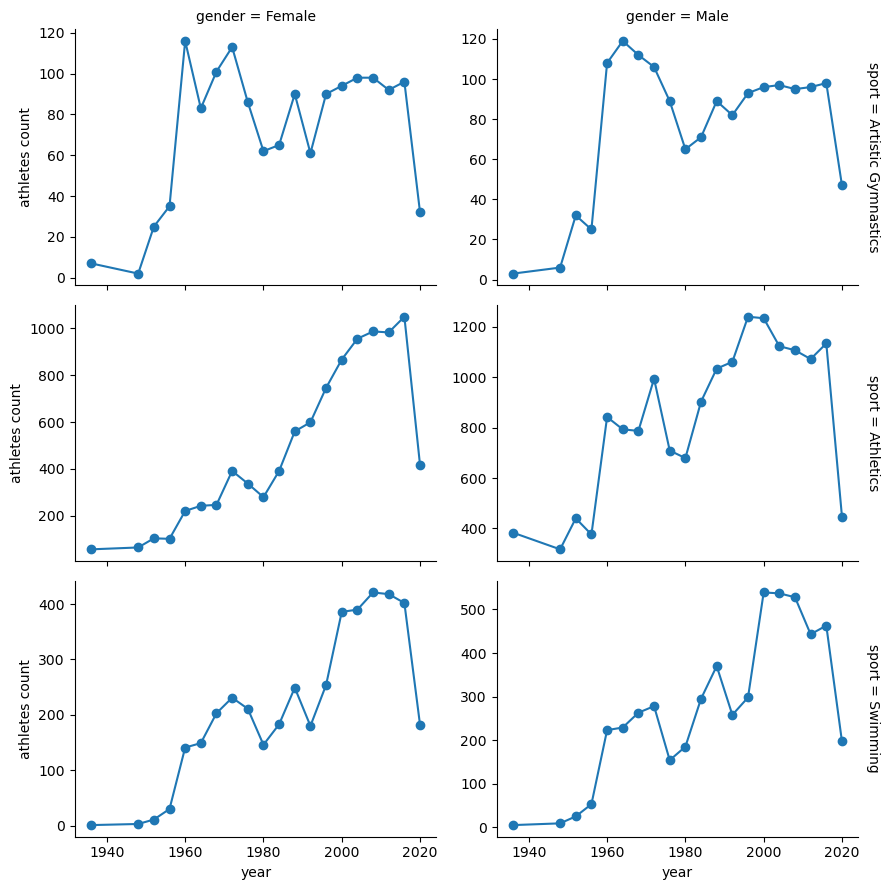

In [30]:
# Do a Faceted plot to get a comprenhensive understanding of the trends of number of athletes on the 3 sport through out the olympic after 1936
three_sport_athletes_plot = sns.FacetGrid(group_three_sports_df, col='gender', row='sport', margin_titles=True, sharey=False, aspect=1.5)

three_sport_athletes_plot.map(plt.plot, 'year', 'athletes count', marker='o')

plt.show()

In [31]:
# Gender partity analysis in these 3 sport in the olympics from 1936 to 2020
# Group by year and sport and find total number of athletes, create a new df
group_gender_parity = group_three_sports_df.groupby(['year', 'sport'])['athletes count'].sum()
group_gender_parity_df = pd.DataFrame(group_gender_parity)

# Reset the index to be able to plot using seaborn
group_gender_parity_df.reset_index(inplace=True)

# Rename the column to facilitate the afterward merge
group_gender_parity_df = group_gender_parity_df.rename(columns={'athletes count': 'total athletes year & sport'})
group_gender_parity_df.head(10)

,year,sport,total athletes year & sport
0,1936,Artistic Gymnastics,10
1,1936,Athletics,439
2,1936,Swimming,6
3,1948,Artistic Gymnastics,8
4,1948,Athletics,381
5,1948,Swimming,12
6,1952,Artistic Gymnastics,57
7,1952,Athletics,543
8,1952,Swimming,36
9,1956,Artistic Gymnastics,60


In [32]:
# Merge group_three_sports_df and group_gender_parity_df
merge_three_sport_gender_parity_df = pd.merge(group_three_sports_df, group_gender_parity_df, on=['year', 'sport'], how='left')
merge_three_sport_gender_parity_df

# Add column to analize gender parity per sport
merge_three_sport_gender_parity_df['participation %'] = round((merge_three_sport_gender_parity_df['athletes count'] / merge_three_sport_gender_parity_df['total athletes year & sport']) * 100, 2)
merge_three_sport_gender_parity_df

,year,sport,gender,athletes count,total athletes year & sport,participation %
0,1936,Artistic Gymnastics,Female,7,10,70.00
1,1936,Artistic Gymnastics,Male,3,10,30.00
2,1936,Athletics,Female,56,439,12.76
3,1936,Athletics,Male,383,439,87.24
4,1936,Swimming,Female,1,6,16.67
...,...,...,...,...,...,...
115,2020,Artistic Gymnastics,Male,47,79,59.49
116,2020,Athletics,Female,416,863,48.20
117,2020,Athletics,Male,447,863,51.80
118,2020,Swimming,Female,182,379,48.02


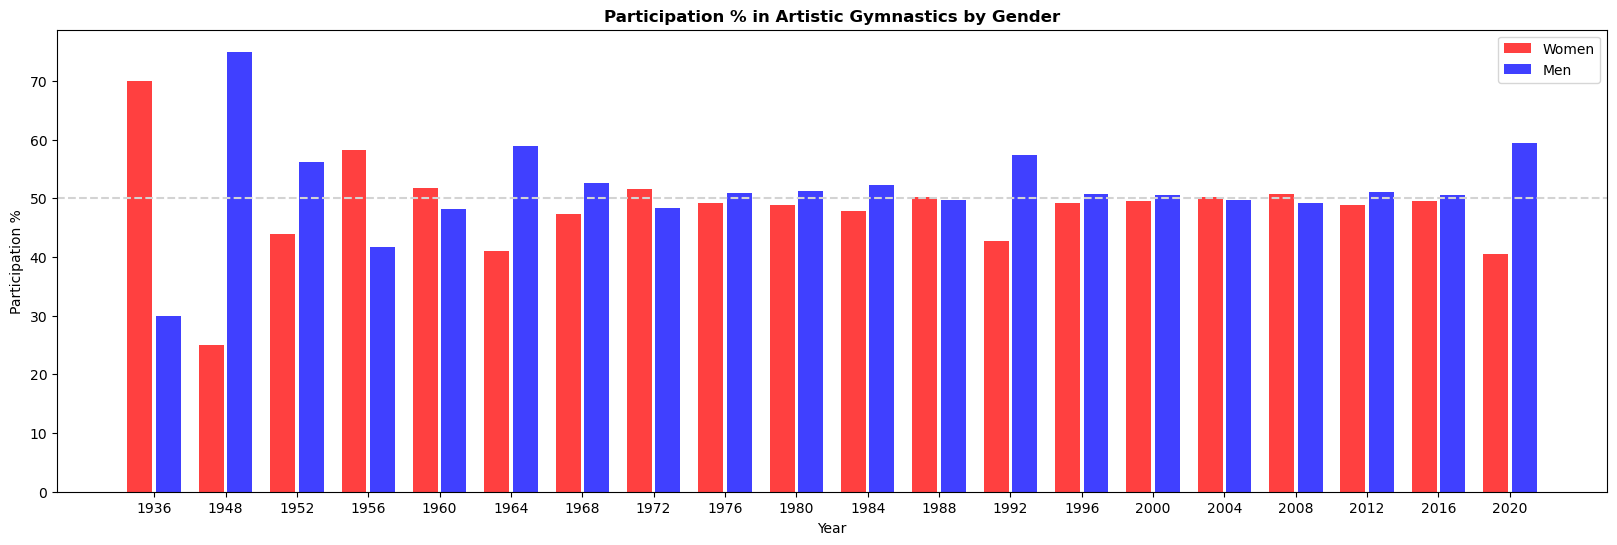

In [33]:
# Create a gender parity plot for Artistic Gymnastics
# Separate Male and Female
x_values = merge_three_sport_gender_parity_df['year'].unique()


female = merge_three_sport_gender_parity_df.loc[(merge_three_sport_gender_parity_df['gender'] == 'Female') & (merge_three_sport_gender_parity_df['sport'] == 'Artistic Gymnastics'), :]
male = merge_three_sport_gender_parity_df.loc[(merge_three_sport_gender_parity_df['gender'] == 'Male') & (merge_three_sport_gender_parity_df['sport'] == 'Artistic Gymnastics'), :]

bar_width = 0.35

plt.figure(figsize=(20, 6))
plt.bar(range(len(x_values)), female['participation %'], alpha=0.75, color='r', width=bar_width, align='center', label='Women')
plt.bar([x + bar_width + 0.05 for x in range(len(x_values))], male['participation %'], alpha=0.75, color='b', width=bar_width, align='center', label='Men')
plt.xticks([x + bar_width/2 +0.025 for x in range(len(x_values))], x_values)
plt.title('Participation % in Artistic Gymnastics by Gender', fontweight='bold')
plt.xlabel('Year') 
plt.ylabel('Participation %')
plt.legend(loc='best')
plt.axhline(y=50, color='lightgray', linestyle='--', label='50%')
plt.show()

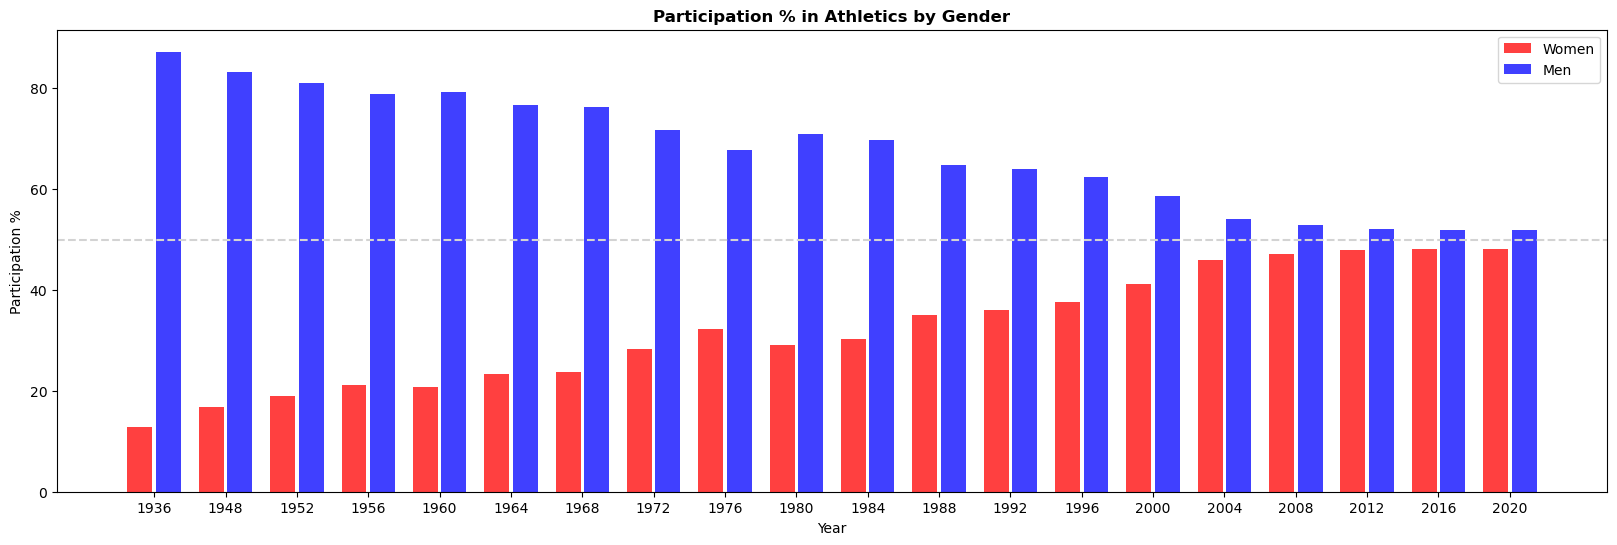

In [34]:
# Create a gender parity plot for Athletics
# Separate Male and Female
x_values = merge_three_sport_gender_parity_df['year'].unique()


female = merge_three_sport_gender_parity_df.loc[(merge_three_sport_gender_parity_df['gender'] == 'Female') & (merge_three_sport_gender_parity_df['sport'] == 'Athletics'), :]
male = merge_three_sport_gender_parity_df.loc[(merge_three_sport_gender_parity_df['gender'] == 'Male') & (merge_three_sport_gender_parity_df['sport'] == 'Athletics'), :]

bar_width = 0.35

plt.figure(figsize=(20, 6))
plt.bar(range(len(x_values)), female['participation %'], alpha=0.75, color='r', width=bar_width, align='center', label='Women')
plt.bar([x + bar_width + 0.05 for x in range(len(x_values))], male['participation %'], alpha=0.75, color='b', width=bar_width, align='center', label='Men')
plt.xticks([x + bar_width/2 +0.025 for x in range(len(x_values))], x_values)
plt.title('Participation % in Athletics by Gender', fontweight='bold')
plt.xlabel('Year') 
plt.ylabel('Participation %')
plt.legend(loc='best')
plt.axhline(y=50, color='lightgray', linestyle='--', label='50%')
plt.show()

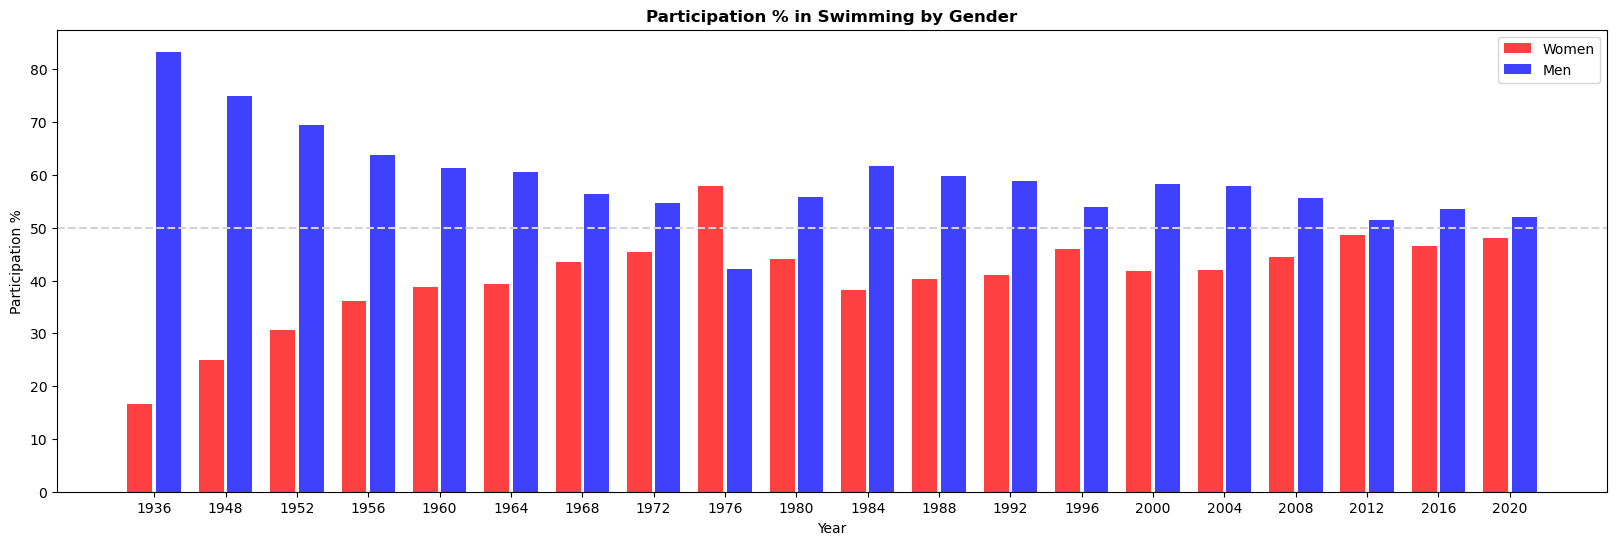

In [35]:
# Create a gender parity plot for Artistic Gymnastics
# Separate Male and Female
x_values = merge_three_sport_gender_parity_df['year'].unique()


female = merge_three_sport_gender_parity_df.loc[(merge_three_sport_gender_parity_df['gender'] == 'Female') & (merge_three_sport_gender_parity_df['sport'] == 'Swimming'), :]
male = merge_three_sport_gender_parity_df.loc[(merge_three_sport_gender_parity_df['gender'] == 'Male') & (merge_three_sport_gender_parity_df['sport'] == 'Swimming'), :]

bar_width = 0.35

plt.figure(figsize=(20, 6))
plt.bar(range(len(x_values)), female['participation %'], alpha=0.75, color='r', width=bar_width, align='center', label='Women')
plt.bar([x + bar_width + 0.05 for x in range(len(x_values))], male['participation %'], alpha=0.75, color='b', width=bar_width, align='center', label='Men')
plt.xticks([x + bar_width/2 +0.025 for x in range(len(x_values))], x_values)
plt.title('Participation % in Swimming by Gender', fontweight='bold')
plt.xlabel('Year') 
plt.ylabel('Participation %')
plt.legend(loc='best')
plt.axhline(y=50, color='lightgray', linestyle='--', label='50%')
plt.show()

In [36]:
# 'Artistic Gymnastics' dataframe for height and weight
artistics_gymnastics_df = three_sports_df.loc[(three_sports_df['sport'] == 'Artistic Gymnastics'), :]
artistics_gymnastics_df.head()

,edition,year,sport,event,name,sex,medal,athlete_age,height_inches,weight_pounds
38506,1936 Summer Olympics,1936,Artistic Gymnastics,"Team All-Around, Women",Stefania Krupa,Female,NaN,27.0,65.0,128.0
38507,1936 Summer Olympics,1936,Artistic Gymnastics,"Team All-Around, Women",Marta Majowska,Female,NaN,25.0,60.0,104.0
38508,1936 Summer Olympics,1936,Artistic Gymnastics,"Team All-Around, Women",Wiesława Noskiewicz,Female,NaN,25.0,59.0,95.0
38509,1936 Summer Olympics,1936,Artistic Gymnastics,"Team All-Around, Women",Matylda Ossadnik,Female,NaN,19.0,63.0,115.0
38510,1936 Summer Olympics,1936,Artistic Gymnastics,"Team All-Around, Women",Klara Sierońska,Female,NaN,23.0,61.0,121.0


In [37]:
# Put years into a list for loop (and later for plot labels)
x_labels = artistics_gymnastics_df['year'].unique()

# Create empty list to fill with height and weight (for plotting)
height = []
weight = []

artistics_gymnastics_df['outliers_height'] = 0
artistics_gymnastics_df['outliers_weight'] = 0

# Create an empty DataFrame with years as columns to store the outliers
outliers_df = pd.DataFrame(columns = x_labels)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for year in x_labels:
    
    # Locate the rows which contain athletes participating each year to get the height and weight
    height_df = artistics_gymnastics_df.loc[(artistics_gymnastics_df['year'] == year), 'height_inches']
    weight_df = artistics_gymnastics_df.loc[(artistics_gymnastics_df['year'] == year), 'weight_pounds']
    
    # add subsets 
    height.append(height_df)
    weight.append(weight_df)
    
    # Determine height outliers using upper and lower bounds
    quartiles_height = height_df.quantile([.25,.75])
    q1_height = quartiles_height[0.25]
    q3_height = quartiles_height[0.75]
    iqr_height = q3_height-q1_height
    lower_bound_height = q1_height - (1.5*iqr_height)
    upper_bound_height = q3_height + (1.5*iqr_height)
    outliers_height = height_df.loc[(height_df < lower_bound_height) | (height_df > upper_bound_height)]
    outliers_height_count = len(outliers_height)
    outliers_height_index = (height_df < lower_bound_height) | (height_df > upper_bound_height)
    outliers_height_indices = outliers_height_index.index[outliers_height_index].tolist() 
    artistics_gymnastics_df.loc[outliers_height_indices, 'outliers_height'] = 1

    # Get the height outlier count per year to the outliers_df
    outliers_df.loc['Height Outliers', year] = outliers_height_count

    # Determine weight outliers using upper and lower bounds
    quartiles_weight = weight_df.quantile([.25,.75])
    q1_weight = quartiles_weight[0.25]
    q3_weight = quartiles_weight[0.75]
    iqr_weight = q3_weight-q1_weight
    lower_bound_weight = q1_weight - (1.5*iqr_weight)
    upper_bound_weight = q3_weight + (1.5*iqr_weight)
    outliers_weight = weight_df.loc[(weight_df < lower_bound_weight) | (weight_df > upper_bound_weight)]
    outliers_weight_count = len(outliers_weight)
    outliers_weight_index = (weight_df < lower_bound_weight) | (weight_df > upper_bound_weight)
    outliers_weight_indices = outliers_weight_index.index[outliers_weight_index].tolist() 
    artistics_gymnastics_df.loc[outliers_weight_indices, 'outliers_weight'] = 1

    # Get the weight outlier count per year to the outliers_df
    outliers_df.loc['Weight Outliers', year] = outliers_weight_count

outliers_df

/var/folders/jg/q65fvmfx6sx7knbdyj1gyr5m0000gn/T/ipykernel_81427/267050732.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  artistics_gymnastics_df['outliers_height'] = 0
/var/folders/jg/q65fvmfx6sx7knbdyj1gyr5m0000gn/T/ipykernel_81427/267050732.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  artistics_gymnastics_df['outliers_weight'] = 0


,1936,1948,1952,1956,1960,1964,1968,1972,1976,1980,1984,1988,1992,1996,2000,2004,2008,2012,2016,2020
Height Outliers,0,0,1,1,6,0,1,0,2,0,1,0,0,0,0,0,0,0,1,1
Weight Outliers,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,2


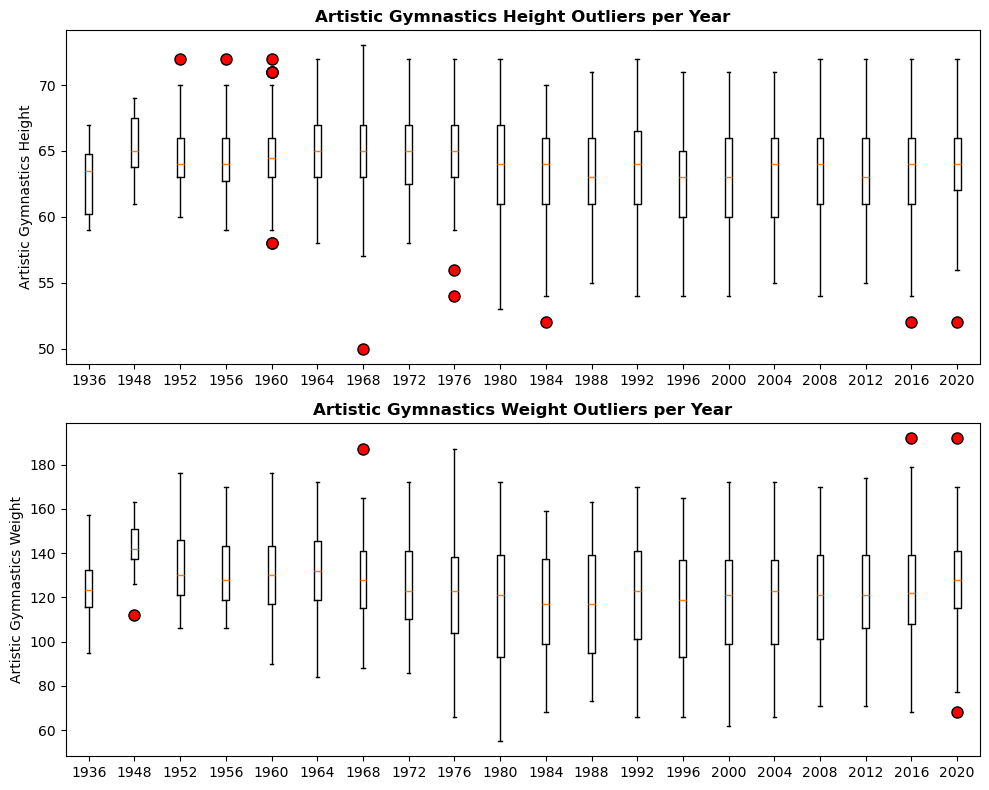

In [38]:
# Generate a box plot that shows the distrubution of 'Artistic Gymnastics' height and weight.
plt.figure(figsize=(10, 8))

for i, year in enumerate(x_labels):
    height_df_year = height[i]
    weight_df_year = weight[i]

    plt.subplot(2, 1, 1)
    plt.boxplot(height_df_year, positions=[i+1], flierprops=dict(marker='o', markerfacecolor='r', markersize=8))
    plt.ylabel('Artistic Gymnastics Height')
    plt.title('Artistic Gymnastics Height Outliers per Year', fontweight='bold')
    plt.xticks(range(1, len(x_labels) + 1), x_labels)

    plt.subplot(2, 1, 2)
    plt.boxplot(weight_df_year, positions=[i+1], flierprops=dict(marker='o', markerfacecolor='r', markersize=8))
    plt.ylabel('Artistic Gymnastics Weight')
    plt.title('Artistic Gymnastics Weight Outliers per Year', fontweight='bold')
    plt.xticks(range(1, len(x_labels) + 1), x_labels)

plt.tight_layout()
plt.show()

In [39]:
# Lenght of the list of all Artistic Gymnastics events
len(artistics_gymnastics_df['event'].unique())

14

In [40]:
# Create a df of only athletes that are height outliers in Artistic Gymnastics
# Find the lenght of the new df to determine if pie plot is relevant 
artistics_gymnastics_outliers_height_df = artistics_gymnastics_df.loc[(artistics_gymnastics_df['outliers_height'] == 1), :]
artistics_gymnastics_outliers_height_df.reset_index()
len(artistics_gymnastics_outliers_height_df)

14

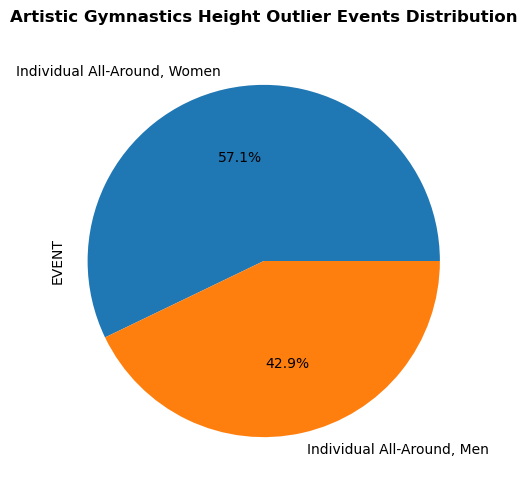

In [41]:
# Create pie plot for Artistic Gymnastics height outlier per event and count the athletes
athletes_counts = artistics_gymnastics_outliers_height_df['event'].value_counts()
events_plot = athletes_counts.plot(kind="pie", figsize=(5, 6), y='event', autopct="%1.1f%%")
events_plot.set_ylabel('EVENT')
plt.title('Artistic Gymnastics Height Outlier Events Distribution', fontweight='bold')
plt.axis("equal")
plt.show()

In [42]:
# Create a df of only athletes that are weight outliers in Artistic Gymnastics
# Find the lenght of the new df to determine if pie plot is relevant 
artistics_gymnastics_outliers_weight_df = artistics_gymnastics_df.loc[(artistics_gymnastics_df['outliers_weight'] == 1), :]
artistics_gymnastics_outliers_weight_df.reset_index()
len(artistics_gymnastics_outliers_weight_df)

5

In [43]:
# 'Swimming' dataframe for height and weight
swimming_df = three_sports_df.loc[(three_sports_df['sport'] == 'Swimming'), :]
swimming_df.head()

,edition,year,sport,event,name,sex,medal,athlete_age,height_inches,weight_pounds
40194,1936 Summer Olympics,1936,Swimming,"1,500 metres Freestyle, Men",Jorge Berroeta,Male,NaN,18.0,72.0,225.0
40258,1936 Summer Olympics,1936,Swimming,"100 metres Freestyle, Men",Egon Roolaid,Male,NaN,18.0,70.0,165.0
40440,1936 Summer Olympics,1936,Swimming,"400 metres Freestyle, Men",Shozo Makino,Male,Bronze,21.0,61.0,119.0
40505,1936 Summer Olympics,1936,Swimming,"4 × 200 metres Freestyle Relay, Men",Teófilo Yldefonso,Male,NaN,34.0,67.0,161.0
40549,1936 Summer Olympics,1936,Swimming,"200 metres Breaststroke, Women",Anne Govednik,Female,NaN,20.0,64.0,99.0


In [44]:
# Put years into a list for loop (and later for plot labels)
x_labels = swimming_df['year'].unique()

# Create empty list to fill with height and weight (for plotting)
height = []
weight = []

swimming_df['outliers_height'] = 0
swimming_df['outliers_weight'] = 0

# Create an empty DataFrame with years as columns to store the outliers
outliers_df = pd.DataFrame(columns = x_labels)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for year in x_labels:
    
    # Locate the rows which contain athletes participating each year to get the height and weight
    height_df = swimming_df.loc[(swimming_df['year'] == year), 'height_inches']
    weight_df = swimming_df.loc[(swimming_df['year'] == year), 'weight_pounds']
    
    # add subsets 
    height.append(height_df)
    weight.append(weight_df)
    
    # Determine height outliers using upper and lower bounds
    quartiles_height = height_df.quantile([.25,.75])
    q1_height = quartiles_height[0.25]
    q3_height = quartiles_height[0.75]
    iqr_height = q3_height-q1_height
    lower_bound_height = q1_height - (1.5*iqr_height)
    upper_bound_height = q3_height + (1.5*iqr_height)
    outliers_height = height_df.loc[(height_df < lower_bound_height) | (height_df > upper_bound_height)]
    outliers_height_count = len(outliers_height)
    outliers_height_index = (height_df < lower_bound_height) | (height_df > upper_bound_height)
    outliers_height_indices = outliers_height_index.index[outliers_height_index].tolist() 
    swimming_df.loc[outliers_height_indices, 'outliers_height'] = 1

    # Get the height outlier count per year to the outliers_df
    outliers_df.loc['Height Outliers', year] = outliers_height_count

    # Determine weight outliers using upper and lower bounds
    quartiles_weight = weight_df.quantile([.25,.75])
    q1_weight = quartiles_weight[0.25]
    q3_weight = quartiles_weight[0.75]
    iqr_weight = q3_weight-q1_weight
    lower_bound_weight = q1_weight - (1.5*iqr_weight)
    upper_bound_weight = q3_weight + (1.5*iqr_weight)
    outliers_weight = weight_df.loc[(weight_df < lower_bound_weight) | (weight_df > upper_bound_weight)]
    outliers_weight_count = len(outliers_weight)
    outliers_weight_index = (weight_df < lower_bound_weight) | (weight_df > upper_bound_weight)
    outliers_weight_indices = outliers_weight_index.index[outliers_weight_index].tolist() 
    swimming_df.loc[outliers_weight_indices, 'outliers_weight'] = 1

    # Get the weight outlier count per year to the outliers_df
    outliers_df.loc['Weight Outliers', year] = outliers_weight_count

outliers_df

/var/folders/jg/q65fvmfx6sx7knbdyj1gyr5m0000gn/T/ipykernel_81427/695265652.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swimming_df['outliers_height'] = 0
/var/folders/jg/q65fvmfx6sx7knbdyj1gyr5m0000gn/T/ipykernel_81427/695265652.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swimming_df['outliers_weight'] = 0


,1936,1948,1952,1956,1960,1964,1968,1972,1976,1980,1984,1988,1992,1996,2000,2004,2008,2012,2016,2020
Height Outliers,0,0,0,0,0,2,1,1,1,2,0,2,0,0,0,0,1,0,1,0
Weight Outliers,0,1,1,1,0,0,0,0,1,0,0,0,0,1,2,1,1,0,1,0


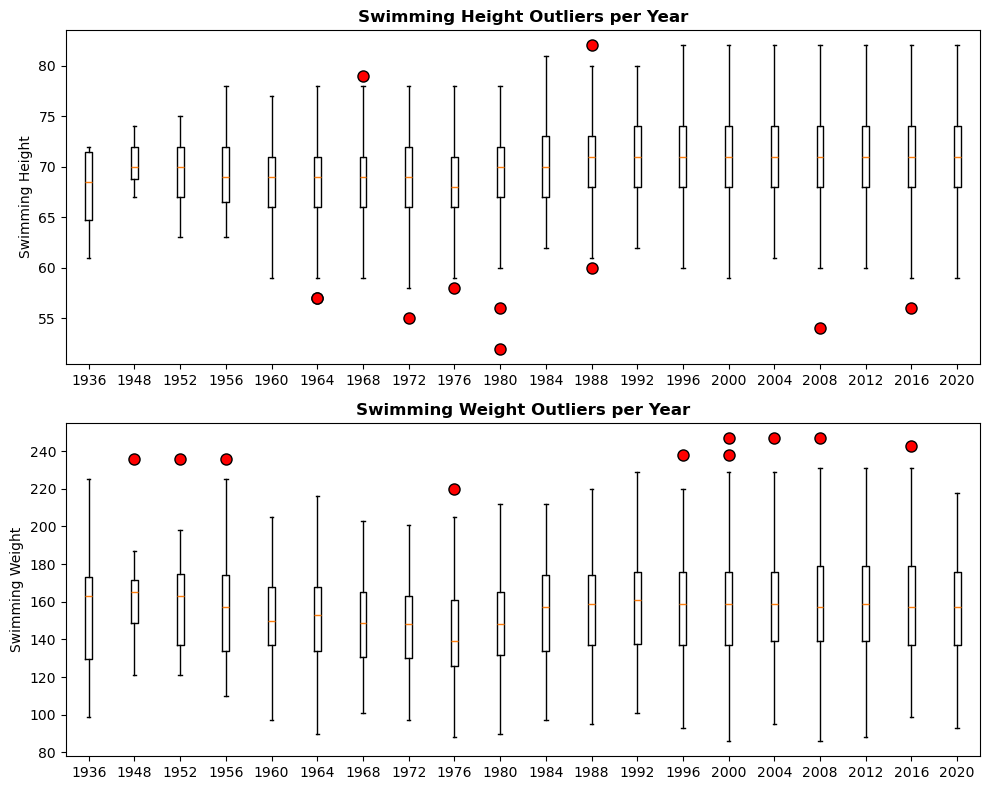

In [45]:
# Generate a box plot that shows the distrubution of 'Artistic Gymnastics' height and weight.
plt.figure(figsize=(10, 8))

for i, year in enumerate(x_labels):
    height_df_year = height[i]
    weight_df_year = weight[i]

    plt.subplot(2, 1, 1)
    plt.boxplot(height_df_year, positions=[i+1], flierprops=dict(marker='o', markerfacecolor='r', markersize=8))
    plt.ylabel('Swimming Height')
    plt.title('Swimming Height Outliers per Year', fontweight='bold')
    plt.xticks(range(1, len(x_labels) + 1), x_labels)

    plt.subplot(2, 1, 2)
    plt.boxplot(weight_df_year, positions=[i+1], flierprops=dict(marker='o', markerfacecolor='r', markersize=8))
    plt.ylabel('Swimming Weight')
    plt.title('Swimming Weight Outliers per Year', fontweight='bold')
    plt.xticks(range(1, len(x_labels) + 1), x_labels)

plt.tight_layout()
plt.show()

In [46]:
# Lenght of the list of all Swimming events
len(swimming_df['event'].unique())

35

In [47]:
# Create a df of only athletes that are height outliers in Swimming
# Find the lenght of the new df to determine if pie plot is relevant 
swimming_outliers_height_df = swimming_df.loc[(swimming_df['outliers_height'] == 1), :]
swimming_outliers_height_df.reset_index()
len(swimming_outliers_height_df)

11

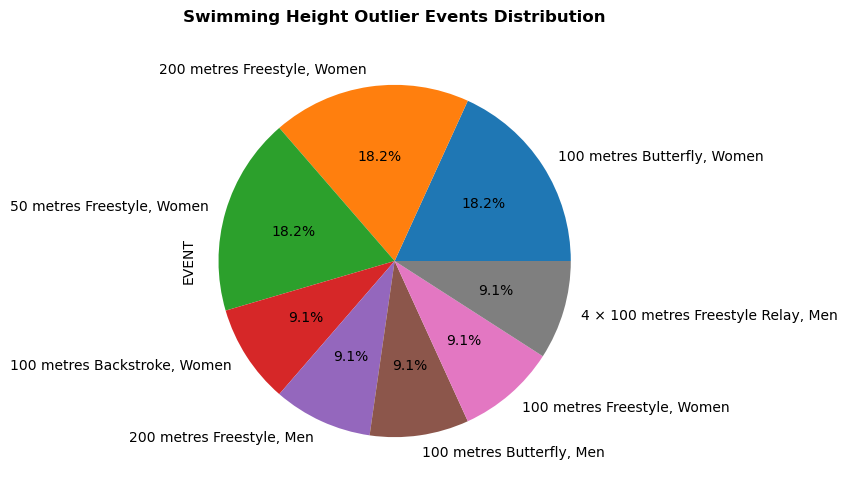

In [48]:
# Create pie plot for Swimming height outlier per event and count the athletes
athletes_counts = swimming_outliers_height_df['event'].value_counts()
events_plot = athletes_counts.plot(kind="pie", figsize=(5, 6), y='event', autopct="%1.1f%%")
events_plot.set_ylabel('EVENT')
plt.title('Swimming Height Outlier Events Distribution', fontweight='bold')
plt.axis("equal")
plt.show()

In [49]:
# Create a df of only athletes that are weight outliers in Swimming
# Find the lenght of the new df to determine if pie plot is relevant 
swimming_outliers_weight_df = swimming_df.loc[(swimming_df['outliers_weight'] == 1), :]
swimming_outliers_weight_df.reset_index()
len(swimming_outliers_weight_df)

10

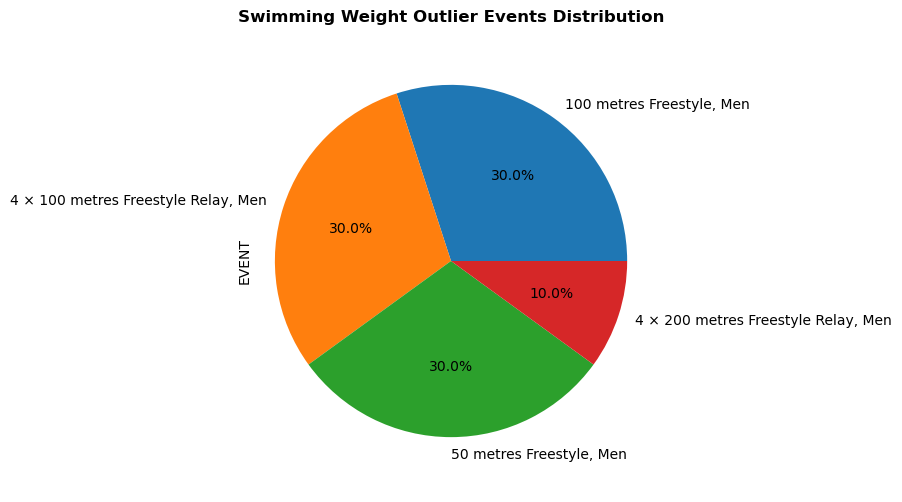

In [50]:
# Create pie plot for Swimming weight outlier per event and count the athletes
athletes_counts = swimming_outliers_weight_df['event'].value_counts()
events_plot = athletes_counts.plot(kind="pie", figsize=(5, 6), y='event', autopct="%1.1f%%")
events_plot.set_ylabel('EVENT')
plt.title('Swimming Weight Outlier Events Distribution', fontweight='bold')
plt.axis("equal")
plt.show()

In [51]:
# 'Athletics' dataframe for height and weight
athletics_df = three_sports_df.loc[(three_sports_df['sport'] == 'Athletics'), :]
athletics_df.head()

,edition,year,sport,event,name,sex,medal,athlete_age,height_inches,weight_pounds
41203,1936 Summer Olympics,1936,Athletics,"200 metres, Men",Carlos Hofmeister,Male,NaN,27.0,70.0,161.0
41208,1936 Summer Olympics,1936,Athletics,"5,000 metres, Men",Luis Oliva,Male,NaN,28.0,69.0,152.0
41213,1936 Summer Olympics,1936,Athletics,"10,000 metres, Men",Juan Carlos Zabala,Male,NaN,25.0,65.0,121.0
41216,1936 Summer Olympics,1936,Athletics,"800 metres, Men",Gerald Backhouse,Male,NaN,24.0,65.0,126.0
41220,1936 Summer Olympics,1936,Athletics,"High Jump, Men",Jack Metcalfe,Male,NaN,25.0,72.0,176.0


In [52]:
# Put years into a list for loop (and later for plot labels)
x_labels = athletics_df['year'].unique()

# Create empty list to fill with height and weight (for plotting)
height = []
weight = []

athletics_df['outliers_height'] = 0
athletics_df['outliers_weight'] = 0

# Create an empty DataFrame with years as columns to store the outliers
outliers_df = pd.DataFrame(columns = x_labels)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for year in x_labels:
    
    # Locate the rows which contain athletes participating each year to get the height and weight
    height_df = athletics_df.loc[(athletics_df['year'] == year), 'height_inches']
    weight_df = athletics_df.loc[(athletics_df['year'] == year), 'weight_pounds']
    
    # add subsets 
    height.append(height_df)
    weight.append(weight_df)
    
    # Determine height outliers using upper and lower bounds
    quartiles_height = height_df.quantile([.25,.75])
    q1_height = quartiles_height[0.25]
    q3_height = quartiles_height[0.75]
    iqr_height = q3_height-q1_height
    lower_bound_height = q1_height - (1.5*iqr_height)
    upper_bound_height = q3_height + (1.5*iqr_height)
    outliers_height = height_df.loc[(height_df < lower_bound_height) | (height_df > upper_bound_height)]
    outliers_height_count = len(outliers_height)
    outliers_height_index = (height_df < lower_bound_height) | (height_df > upper_bound_height)
    outliers_height_indices = outliers_height_index.index[outliers_height_index].tolist() 
    athletics_df.loc[outliers_height_indices, 'outliers_height'] = 1

    # Get the height outlier count per year to the outliers_df
    outliers_df.loc['Height Outliers', year] = outliers_height_count

    # Determine weight outliers using upper and lower bounds
    quartiles_weight = weight_df.quantile([.25,.75])
    q1_weight = quartiles_weight[0.25]
    q3_weight = quartiles_weight[0.75]
    iqr_weight = q3_weight-q1_weight
    lower_bound_weight = q1_weight - (1.5*iqr_weight)
    upper_bound_weight = q3_weight + (1.5*iqr_weight)
    outliers_weight = weight_df.loc[(weight_df < lower_bound_weight) | (weight_df > upper_bound_weight)]
    outliers_weight_count = len(outliers_weight)
    outliers_weight_index = (weight_df < lower_bound_weight) | (weight_df > upper_bound_weight)
    outliers_weight_indices = outliers_weight_index.index[outliers_weight_index].tolist() 
    athletics_df.loc[outliers_weight_indices, 'outliers_weight'] = 1

    # Get the weight outlier count per year to the outliers_df
    outliers_df.loc['Weight Outliers', year] = outliers_weight_count

outliers_df

/var/folders/jg/q65fvmfx6sx7knbdyj1gyr5m0000gn/T/ipykernel_81427/2900368617.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  athletics_df['outliers_height'] = 0
/var/folders/jg/q65fvmfx6sx7knbdyj1gyr5m0000gn/T/ipykernel_81427/2900368617.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  athletics_df['outliers_weight'] = 0


,1936,1948,1952,1956,1960,1964,1968,1972,1976,1980,1984,1988,1992,1996,2000,2004,2008,2012,2016,2020
Height Outliers,3,1,2,0,2,1,2,3,2,5,8,9,7,14,24,26,0,19,1,6
Weight Outliers,17,14,16,29,61,55,59,84,78,54,67,82,84,92,105,107,106,109,106,47


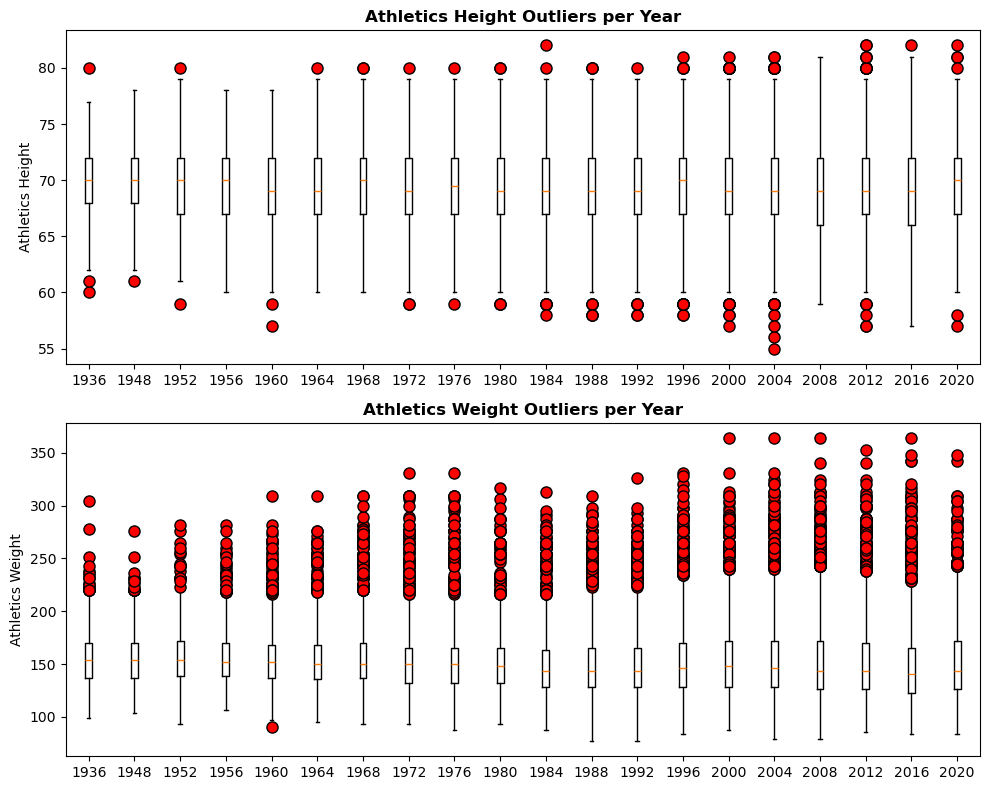

In [53]:
# Generate a box plot that shows the distrubution of 'Artistic Gymnastics' height and weight.
plt.figure(figsize=(10, 8))

for i, year in enumerate(x_labels):
    height_df_year = height[i]
    weight_df_year = weight[i]

    plt.subplot(2, 1, 1)
    plt.boxplot(height_df_year, positions=[i+1], flierprops=dict(marker='o', markerfacecolor='r', markersize=8))
    plt.ylabel('Athletics Height')
    plt.title('Athletics Height Outliers per Year', fontweight='bold')
    plt.xticks(range(1, len(x_labels) + 1), x_labels)

    plt.subplot(2, 1, 2)
    plt.boxplot(weight_df_year, positions=[i+1], flierprops=dict(marker='o', markerfacecolor='r', markersize=8))
    plt.ylabel('Athletics Weight')
    plt.title('Athletics Weight Outliers per Year', fontweight='bold')
    plt.xticks(range(1, len(x_labels) + 1), x_labels)

plt.tight_layout()
plt.show()

In [54]:
# Lenght of the list of all Athletics events
len(athletics_df['event'].unique())

55

In [55]:
# Create a df of only athletes that are height outliers in Athletics
# Find the lenght of the new df to determine if pie plot is relevant 
athletics_outliers_height_df = athletics_df.loc[(athletics_df['outliers_height'] == 1), :]
len(athletics_outliers_height_df.reset_index())

135

In [56]:
# Create pie plot for Athletics height outlier per event and count the athletes
athletes_counts = athletics_outliers_height_df['event'].value_counts()
len(athletes_counts)

22

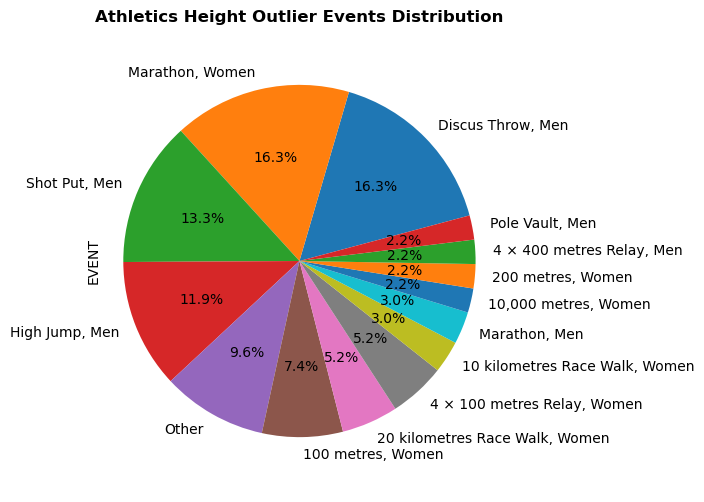

In [57]:
# Create pie plot for Athletics height outlier per event and count the athletes

# Group all sport with less than 3 athletes into a category called 'Other'
athletes_counts_df = pd.DataFrame(athletes_counts).reset_index()
athletes_counts_df['event_adj'] = athletes_counts_df['event']
athletes_counts_df.loc[athletes_counts_df['count'] < 3, 'event_adj'] = 'Other'

# Group by the event_adj column and sort by count
athletes_counts_adj_df = athletes_counts_df.groupby('event_adj')['count'].sum()
athletes_counts_adj_df = athletes_counts_adj_df.sort_values(ascending=False)

# Plot
events_plot = athletes_counts_adj_df.plot(kind="pie", figsize=(5, 6), y='event_adj', autopct="%1.1f%%", startangle=15)
events_plot.set_ylabel('EVENT')
plt.title('Athletics Height Outlier Events Distribution', fontweight='bold')
plt.axis("equal")
plt.show()

In [58]:
# Create a df of only athletes that are weight outliers in Athletics
# Find the lenght of the new df to determine if pie plot is relevant 
athletics_outliers_weight_df = athletics_df.loc[(athletics_df['outliers_weight'] == 1), :]
len(athletics_outliers_weight_df.reset_index())

1372

In [59]:
# Create pie plot for Athletics height outlier per event and count the athletes
athletes_counts = athletics_outliers_weight_df['event'].value_counts()
len(athletes_counts)

13

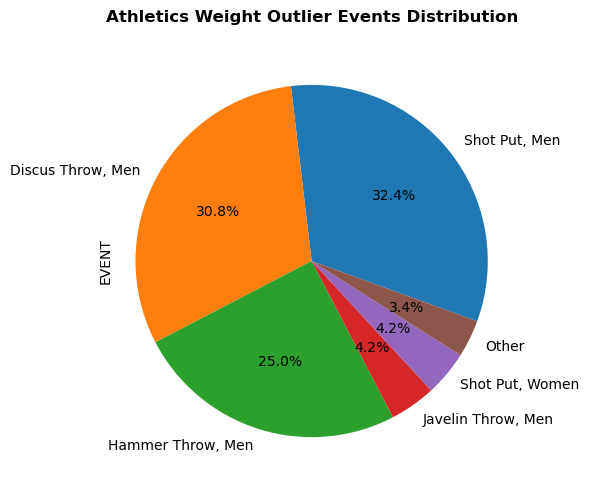

In [60]:
# Create pie plot for Athletics height outlier per event and count the athletes

# Group all sport with less than 25 athletes into a category called 'Other'
athletes_counts_df = pd.DataFrame(athletes_counts).reset_index()
athletes_counts_df['event_adj'] = athletes_counts_df['event']
athletes_counts_df.loc[athletes_counts_df['count'] < 25, 'event_adj'] = 'Other'

# Group by the event_adj column and sort by count
athletes_counts_adj_df = athletes_counts_df.groupby('event_adj')['count'].sum()
athletes_counts_adj_df = athletes_counts_adj_df.sort_values(ascending=False)

# Plot
events_plot = athletes_counts_adj_df.plot(kind="pie", figsize=(5, 6), y='event_adj', autopct="%1.1f%%", startangle=340)
events_plot.set_ylabel('EVENT')
plt.title('Athletics Weight Outlier Events Distribution', fontweight='bold')
plt.axis("equal")
plt.show()